In [1]:
import sys
sys.path = ['', '/home/submit/lavezzo/zstuff/WRemnants', '/home/submit/lavezzo/zstuff/WRemnants/narf', '/usr/lib/python311.zip', '/usr/lib/python3.11', '/usr/lib/python3.11/lib-dynload', '/opt/venv/lib/python3.11/site-packages']
import argparse
import os
import lz4.frame
import pickle
import hist
from utilities import boostHistHelpers as hh, logging
#import wremnants
import hdf5plugin

import h5py
import narf
from narf import ioutils
import ROOT
from utilities import input_tools as it
import mplhep as hep
import matplotlib.pyplot as plt
import numpy as np
hep.style.use("CMS")
plt.style.use(hep.style.CMS)
plt.rcParams['figure.dpi'] = 50

Welcome to JupyROOT 6.28/06


Parameters

In [3]:
INPUT_FILE = '/data/submit/cms/store/user/lavezzo/ZBosonAnalysis//TheoryAgnostic/28_09_2023__10_31_20/mz_dilepton.hdf5'
LUMI = 'xx'

Looking at the contents of the hdf5 file

In [4]:
h5file = h5py.File(INPUT_FILE, "r")
results = narf.ioutils.pickle_load_h5py(h5file["results"])

In [5]:
processes = list(results.keys())
print(processes)

['dataPostVFP', 'ZmumuPostVFP', 'DYJetsToMuMuMass10to50PostVFP', 'ZtautauPostVFP', 'QCDmuEnrichPt15PostVFP', 'Diboson', 'Top', 'Wtaunu', 'Wmunu', 'BkgZmumu', 'meta_info']


In [6]:
proc = "ZmumuPostVFP"

hists = list(results[proc]['output'].keys())
print(hists)

['xnorm', 'xnorm_massWeightZ', 'weight', 'nominal', 'nominal_ptll', 'nominal_ptll_pdfMSHT20', 'nominal_ptll_pdfMSHT20alphaS002', 'nominal_ptll_qcdScale', 'nominal_ptll_uncorr', 'nominal_ptll_scetlib_dyturboCorr', 'nominal_ptll_horacenloewCorr', 'nominal_ptll_qcdScaleByHelicity', 'nominal_ptll_massWeightZ', 'nominal_mll', 'nominal_mll_pdfMSHT20', 'nominal_mll_pdfMSHT20alphaS002', 'nominal_mll_qcdScale', 'nominal_mll_uncorr', 'nominal_mll_scetlib_dyturboCorr', 'nominal_mll_horacenloewCorr', 'nominal_mll_qcdScaleByHelicity', 'nominal_mll_massWeightZ', 'nominal_yll', 'nominal_yll_pdfMSHT20', 'nominal_yll_pdfMSHT20alphaS002', 'nominal_yll_qcdScale', 'nominal_yll_uncorr', 'nominal_yll_scetlib_dyturboCorr', 'nominal_yll_horacenloewCorr', 'nominal_yll_qcdScaleByHelicity', 'nominal_yll_massWeightZ', 'nominal_etaPlus', 'nominal_etaPlus_pdfMSHT20', 'nominal_etaPlus_pdfMSHT20alphaS002', 'nominal_etaPlus_qcdScale', 'nominal_etaPlus_uncorr', 'nominal_etaPlus_scetlib_dyturboCorr', 'nominal_etaPlus_ho

In [7]:
def findHists(hists, match):
    return [k for k in hists if match.lower() in k.lower()]

findHists(hists, 'hel')

['nominal_ptll_qcdScaleByHelicity',
 'nominal_mll_qcdScaleByHelicity',
 'nominal_yll_qcdScaleByHelicity',
 'nominal_etaPlus_qcdScaleByHelicity',
 'nominal_etaMinus_qcdScaleByHelicity',
 'nominal_ptPlus_qcdScaleByHelicity',
 'nominal_ptMinus_qcdScaleByHelicity',
 'nominal_cosThetaStarll_qcdScaleByHelicity',
 'nominal_phiStarll_qcdScaleByHelicity']

In [8]:
results['ZmumuPostVFP']['output']['nominal'].get()

Hist(
  Variable([0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 23, 27, 32, 40, 55, 100], underflow=False, name='ptll'),
  Regular(20, -2.5, 2.5, name='yll'),
  Regular(20, -1, 1, underflow=False, overflow=False, name='cosThetaStarll'),
  Regular(20, -3.14159, 3.14159, circular=True, name='phiStarll'),
  Variable([0, 0.5, 1, 1.5, 2, 2.5], underflow=False, overflow=False, name='absYVgenSig'),
  Variable(array([  0. ,   2.5,   5. ,   8. ,  11.4,  14.9,  18.5,  22. ,  25.5,
        29. ,  32.6,  36.4,  40.4,  44.9,  50.2,  56.4,  63.9,  73.4,
        85.4, 105. , 132. , 173. , 253. , 600. ]), underflow=False, name='ptVgenSig'),
  Integer(-1, 8, underflow=False, overflow=False, name='helicity'),
  storage=Weight()) # Sum: WeightedSum(value=8.05477e+06, variance=4.02715e+06) (WeightedSum(value=8.05689e+06, variance=4.03096e+06) with flow)

Print 1D hists

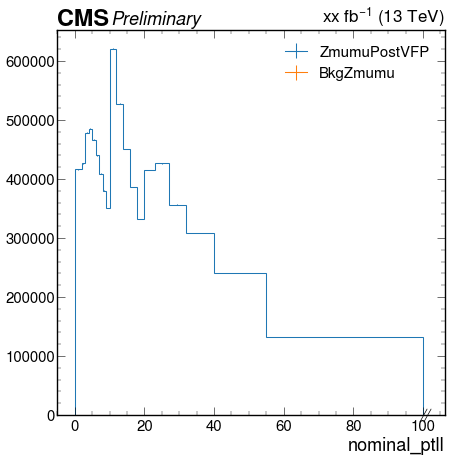

In [9]:
procs = ['ZmumuPostVFP', 'BkgZmumu']
hname = "nominal_ptll"

hep.cms.label(llabel='Preliminary',data=False, lumi=LUMI)

for proc in procs:
    h = results[proc]['output'][hname].get()
    hep.histplot(h, yerr=True, label=proc)

_=plt.xlabel(hname)
_=plt.legend()
#plt.yscale('log')

(Variable([0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 23, 27, 32, 40, 55, 100], underflow=False, name='ptll'), Regular(20, -2.5, 2.5, name='yll'), Regular(20, -1, 1, underflow=False, overflow=False, name='cosThetaStarll'), Regular(20, -3.14159, 3.14159, circular=True, name='phiStarll'), Variable([0, 0.5, 1, 1.5, 2, 2.5], underflow=False, overflow=False, name='absYVgenSig'), Variable(array([  0. ,   2.5,   5. ,   8. ,  11.4,  14.9,  18.5,  22. ,  25.5,
        29. ,  32.6,  36.4,  40.4,  44.9,  50.2,  56.4,  63.9,  73.4,
        85.4, 105. , 132. , 173. , 253. , 600. ]), underflow=False, name='ptVgenSig'), Integer(-1, 8, underflow=False, overflow=False, name='helicity'))


array([-2.88386449e+02, -4.22770578e+02, -4.23287538e+02, -3.53784547e+02,
       -1.89723750e+02, -1.73629457e+02, -1.19606074e+02, -7.75101668e+01,
       -5.69483485e+01, -3.60752799e+01, -1.60994317e+01, -1.22608101e+01,
       -1.30166906e+01, -5.27589659e+00, -7.94043264e+00, -6.38500620e+00,
       -4.40667159e+00, -2.13864975e+00, -7.26236861e-01, -3.84172630e-01,
       -3.67958583e-01, -3.99824203e-02,  0.00000000e+00])

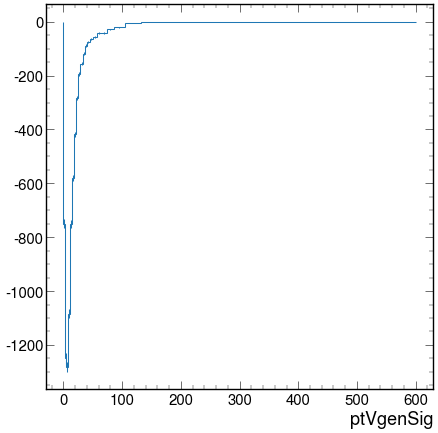

In [13]:
h = results['ZmumuPostVFP']['output']['nominal'].get()
print(h.axes)
_ = hep.histplot(h[::sum,::sum,::sum,::sum, ::sum,:, 5])

h[::sum,::sum,::sum,::sum, ::sum,:, 4].values()

Print 2D hists

Available axes:
ptll
yll
cosThetaStarll
phiStarll
absYVgenSig
ptVgenSig
helicity
  Regular(20, -1, 1, underflow=False, overflow=False, name='cosThetaStarll'),
  Regular(20, -3.14159, 3.14159, circular=True, name='phiStarll'),
  storage=Weight()) # Sum: WeightedSum(value=667497, variance=402449)
  Regular(20, -1, 1, underflow=False, overflow=False, name='cosThetaStarll'),
  Regular(20, -3.14159, 3.14159, circular=True, name='phiStarll'),
  storage=Weight()) # Sum: WeightedSum(value=1642.46, variance=146.22)
  Regular(20, -1, 1, underflow=False, overflow=False, name='cosThetaStarll'),
  Regular(20, -3.14159, 3.14159, circular=True, name='phiStarll'),
  storage=Weight()) # Sum: WeightedSum(value=-24.6525, variance=66.5899)
  Regular(20, -1, 1, underflow=False, overflow=False, name='cosThetaStarll'),
  Regular(20, -3.14159, 3.14159, circular=True, name='phiStarll'),
  storage=Weight()) # Sum: WeightedSum(value=-34.327, variance=98.7931)
  Regular(20, -1, 1, underflow=False, overflow=False,

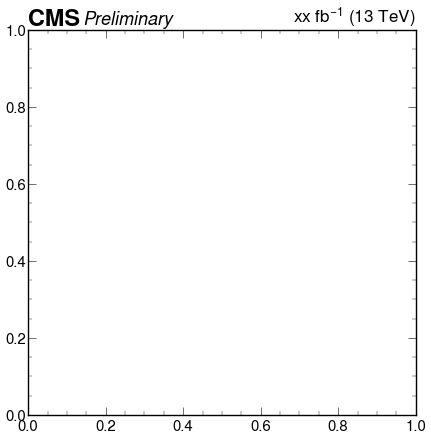

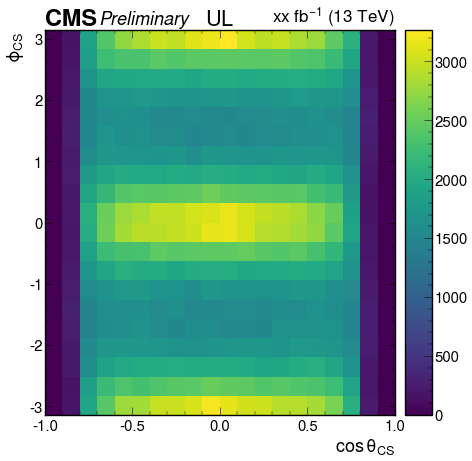

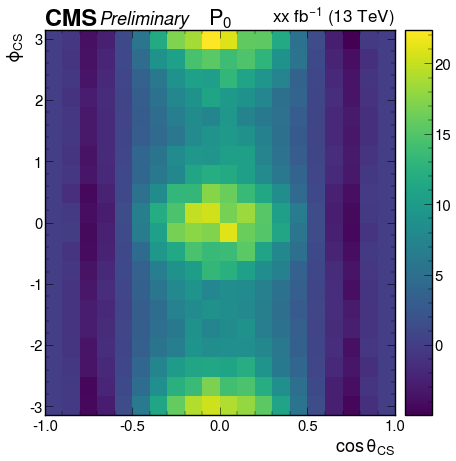

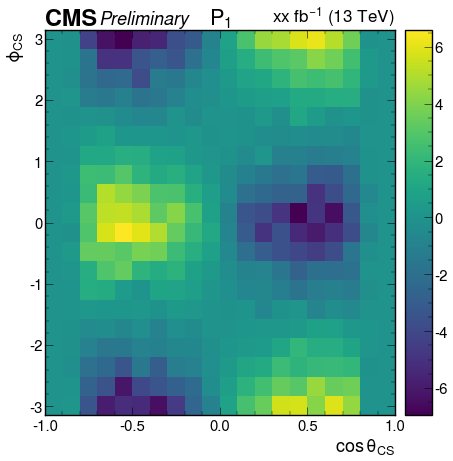

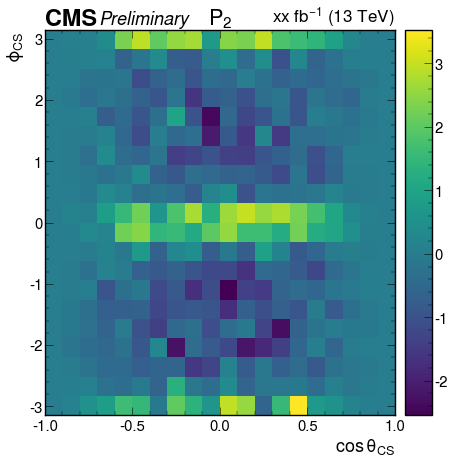

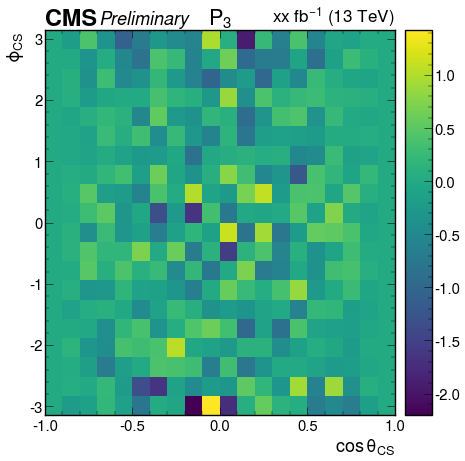

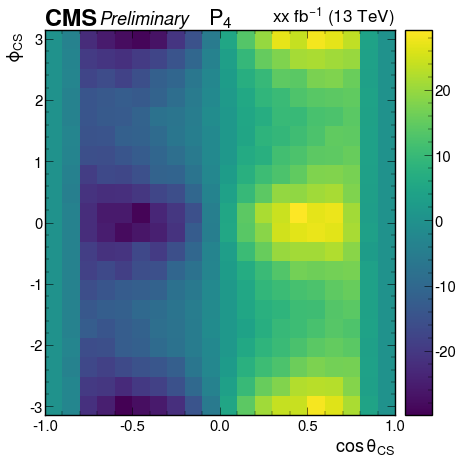

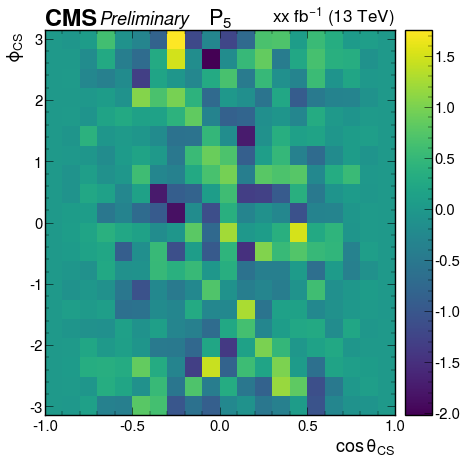

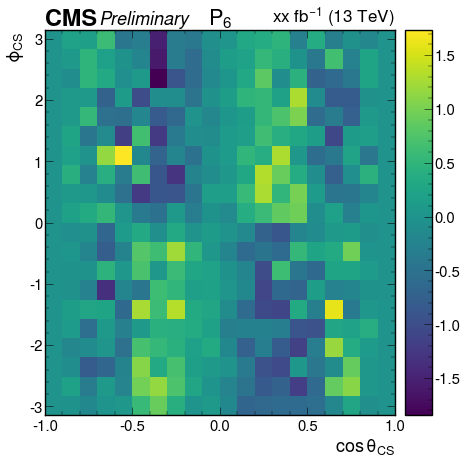

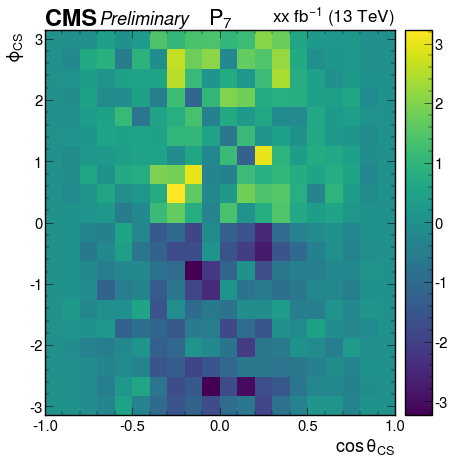

In [51]:
h = results['ZmumuPostVFP']['output']['nominal'].get()

print("Available axes:")
for ax in h.axes:
    print(ax.name)
    
hep.cms.label(llabel='Preliminary',data=False, lumi=LUMI)
for hel in range(len(h.axes[-1])):
    fig = plt.figure()
    ax = fig.subplots()
    _ = hep.hist2dplot(h[::sum,::sum,:,:,::sum, ::sum, hel], ax=ax)
    hep.cms.label(llabel='Preliminary',data=False, lumi=LUMI, ax=ax)
    ax.set_title("$P_{}$".format(hel-1)) if hel != 0 else  plt.title("$UL$")
    ax.set_xlabel(r"$\cos\theta_{CS}$")
    ax.set_ylabel(r"$\phi_{CS}$")
    fig.show()

In [3]:
import wremnants
from wremnants import theory_tools, theory_corrections, plot_tools
from utilities import input_tools, boostHistHelpers as hh,common

with h5py.File('/data/submit/cms/store/user/lavezzo/ZBosonAnalysis/TheoryAgnostic/AngularCoefficients/w_z_gen_dists_NonClosureCorl.hdf5', "r") as ff:
    out = narf.ioutils.pickle_load_h5py(ff["results"])
    h = out['ZmumuPostVFP']['output']['helicity_moments_scale'].get()

In [14]:
h.axes.name

('massVgen', 'y', 'ptVgen', 'chargeVgen', 'helicity', 'muRfact', 'muFfact')

In [10]:
pre = theory_tools.moments_to_angular_coeffs(h.project('massVgen', 'y', 'ptVgen', 'chargeVgen', 'helicity'), sumW2 = False).values()
post = theory_tools.moments_to_angular_coeffs(h, sumW2 = False).project('massVgen', 'y', 'ptVgen', 'chargeVgen', 'helicity').values()

In [12]:
np.where(
    post > 0,
    pre/post,
    1
)

/tmp/ipykernel_2256426/259731744.py:3: RuntimeWarning: divide by zero encountered in divide
  pre/post,
/tmp/ipykernel_2256426/259731744.py:3: RuntimeWarning: invalid value encountered in divide
  pre/post,


array([[[[[ 0.11111111,  0.11393134,  0.11982178, ...,  1.        ,
            1.        ,  0.11094767]],

         [[ 0.11111111,  0.11150826,  0.10916935, ...,  0.10934361,
            0.10487454,  1.        ]],

         [[ 0.11111111,  0.11521985,  1.        , ...,  0.11500971,
            0.09975598,  1.        ]],

         ...,

         [[ 1.        ,  1.        ,  1.        , ...,  1.        ,
            1.        ,  1.        ]],

         [[ 1.        ,  1.        ,  1.        , ...,  1.        ,
            1.        ,  1.        ]],

         [[ 1.        ,  1.        ,  1.        , ...,  1.        ,
            1.        ,  1.        ]]],


        [[[ 0.11111111,  0.1119345 ,  1.        , ...,  0.1129853 ,
            0.1215147 ,  1.        ]],

         [[ 0.11111111,  0.11085661,  0.10608453, ...,  1.        ,
            0.11224966,  1.        ]],

         [[ 0.11111111,  0.11094677,  1.        , ...,  1.        ,
            1.        ,  0.10212229]],

         ..

In [21]:
h.project('helicity').variances()

array([ 7.29655014e+08,  2.82317159e+08, -5.33322611e+06,  6.63191118e+06,
        5.74723793e+05, -7.81985304e+06, -8.22084188e+04,  2.42742675e+05,
       -2.20314548e+05])

In [22]:
h.project('helicity').values()

array([ 7.29655014e+08,  2.82317159e+08, -5.33322611e+06,  6.63191118e+06,
        5.74723793e+05, -7.81985304e+06, -8.22084188e+04,  2.42742675e+05,
       -2.20314548e+05])

In [13]:
def rebin_piecewise(h_in, bins, histtype="hist"):
    """
    Inputs:
        h : histogram
        bins: list of bins as real numbers
        histtype: one of allowed_histtypes to return

    Returns:
        h_out: a histogram of type 'histtype', rebinned according to desired bins
    """

    # only 1D hists supported for now
    if len(h_in.shape) != 1:
        raise Exception("Only 1D hists supported for now")

    # only hist and bh supported
    allowed_histtypes = ["hist", "bh"]
    if histtype not in allowed_histtypes:
        raise Exception("histtype in not in allowed_histtypes")

    # check that the bins are real numbers
    if any([x.imag != 0 for x in bins]):
        raise Exception("Only pass real-valued bins")

    # split the histogram by the bins
    # and for each bin, calculate total amount of events and variance
    z_vals, z_vars = [], []
    for iBin in range(len(bins) - 1):
        if histtype == "hist":
            bin_lo = bins[iBin] * 1.0j
            bin_hi = bins[iBin + 1] * 1.0j
        elif histtype == "bh":
            bin_lo = bh.loc(bins[iBin])
            bin_hi = bh.loc(bins[iBin + 1])

        h_fragment = h_in[bin_lo:bin_hi]
        z_vals.append(h_fragment.sum())
        z_vars.append(h_fragment.sum())

    # fill the histograms
    if histtype == "hist":
        h_out = hist.Hist(
            hist.axis.Variable(bins, label=h_in.axes[0].label, name=h_in.axes[0].name),
            storage=hist.storage.Weight(),
            label=h_in.axes[0].label,
        )
        h_out[:] = np.stack([z_vals, z_vars], axis=-1)

    elif histtype == "bh":
        h_out = bh.Histogram(bh.axis.Variable(bins), storage=bh.storage.Weight())
        h_out[:] = np.stack([z_vals, z_vars], axis=-1)

    return h_out

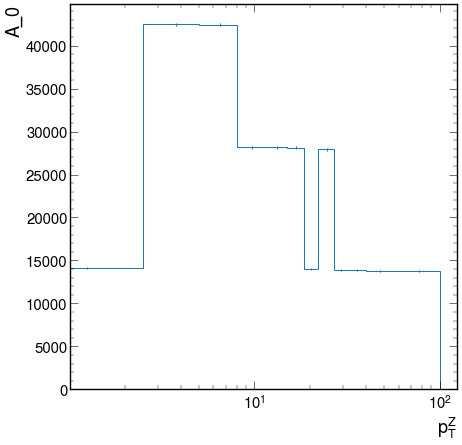

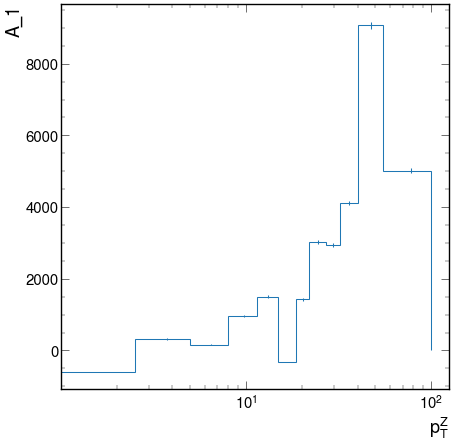

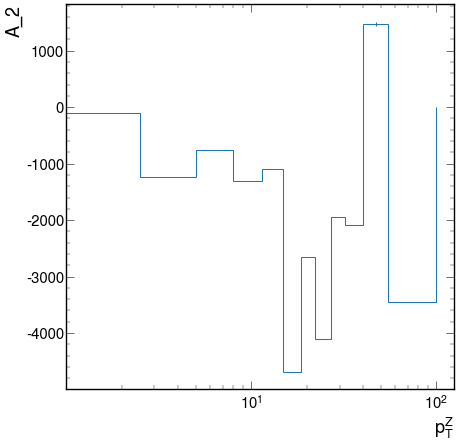

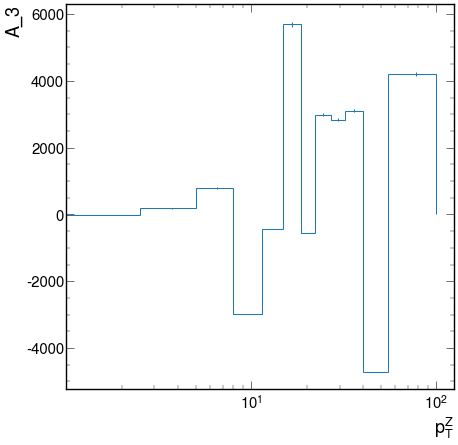

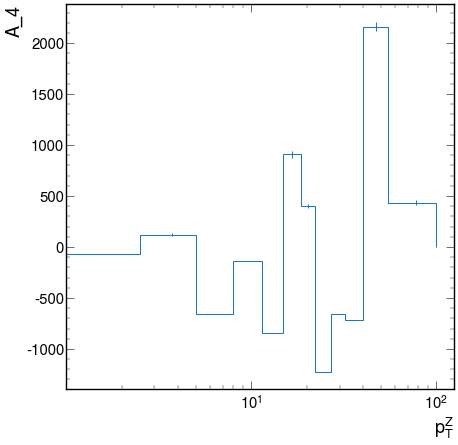

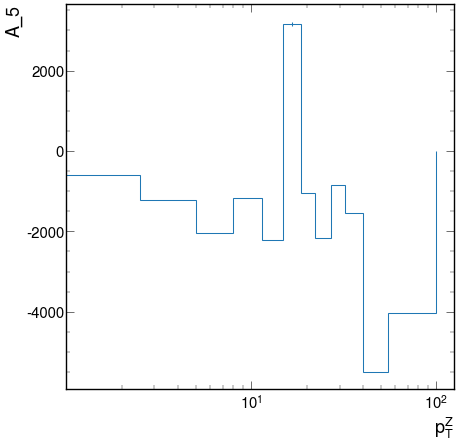

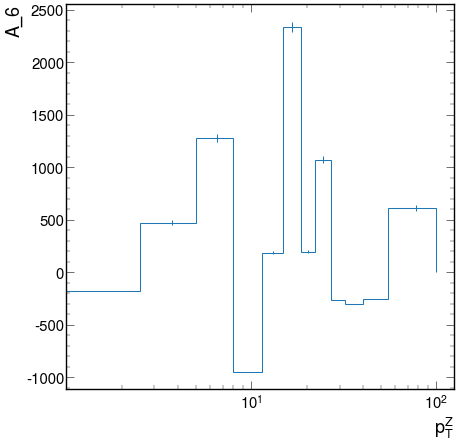

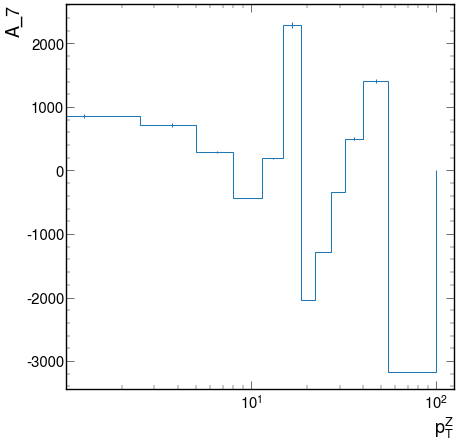

In [16]:
for coeff in range(8):
    hcoeff = corrh[:,coeff]
    hcoeff = rebin_piecewise(hcoeff, [0., 2.5, 5.0, 8.0, 11.4, 14.9, 18.5, 22.0, 27, 32, 40, 55, 100.0])
    hep.histplot(hcoeff)
    plt.xlabel("$p_{T}^Z$")
    plt.ylabel(f"A_{coeff}")
    plt.xscale('log')
    plt.savefig(f"/home/submit/lavezzo/public_html/zstuff/coeffs/coeff_{coeff}.pdf")
    plt.savefig(f"/home/submit/lavezzo/public_html/zstuff/coeffs/coeff_{coeff}.png")
    plt.show()
    plt.close()